In [1]:
%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation

#display(HTML('<script> $(document).ready(function() { $("div.input").hide(); }); </script>'))

# Toggle cell visibility
from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Promijeni vidljivost <a href="javascript:code_toggle()">ovdje</a>.''')
display(tag)


## Stvaranje P-regulatora korištenjem operacijskih pojačala

U analognoj elektronici, operacijska pojačala uobičajeno se koriste za realizaciju proporcionalno-integracijski-derivacijskih (PID) regulatora. Dok matematički modeli linearnih vremenski-nepromjenjivih (LTI) sustava pretpostavljaju idealne uvjete, realni sklopovi možda im ne odgovaraju u potpunosti.
U ovom ćemo primjeru promatrati dva modela koja se koriste za opisivanje operacijskih pojačala i usporediti njihov izlaz s idealiziranim sustavom, a sve kako bismo razumjeli koliko se približavaju idealnom modelu u stacionarnom stanju.

Jedan od najvažnijih parametara operacijskog pojačala je njegovo pojačanje otvorene petlje, frekvencijsko-zavisni parametar koji predstavlja omjer izlaznog napona i razlike ulaznog napona.

<b>Odaberite vrijednost pojačanja otvorene petlje za prikazane izračune!</b>

In [2]:
# Model selector
opampGain = w.ToggleButtons(
    options=[('10 000', 10000), ('200 000', 200000),],
    description='Pojačanje operacijskog pojačala: ', style={'description_width':'30%'})

display(opampGain)

ToggleButtons(description='Pojačanje operacijskog pojačala: ', options=(('10 000', 10000), ('200 000', 200000)…

Idealno operacijsko pojačalo pretpostavlja da je razlika ulaznog napona jednaka nuli, a pojačanje otvorene petlje beskonačno. Takav model omogućuje izračun prijenosne funkcije zasnovan na kompleksnoj impedanciji unaprijedne i povratne veze.
U ovom su primjeru u sklopu prisutni samo otpornici; dakle, rezultat će biti jednostavno pojačanje zatvorene petlje:
<br><br>
$$\frac{V_{out}}{V_{in}}=-\frac{Z_F}{Z_G}$$
<br>
Neke frekvencijske karakteristike mogu se uključiti u linearni model sljedećim proširenjem:
<br><br>
$$\frac{V_{out}}{V_{in}}=-\frac{\frac{-A\cdot Z_F}{Z_G+Z_F}}{1+\frac{A\cdot Z_G}{Z_G+Z_F}}$$
<br>
<b>Postavite sustav tako da se rezultati što više približavaju idealnom sustavu! Pod kojim uvjetima se to događa?</b>

<br><br>
<img src="Images/gain.png" width="30%" />
<br>

In [3]:
# System model

def system_model(rg, rf, a):

    Rg = rg / 1000   # Convert to Ohm
    Rf = rf / 1000

    G_ideal = -Rf / Rg   # Ideal closed-loop gain
    G_ac = (-a*Rf/(Rf+Rg)) / (1+a*Rg/(Rf+Rg))   # Non-ideal closed-loop gain
    
    print('Idealno pojačanje zatvorene petlje:')
    print('{0:.4g}'.format(G_ideal))
    print('\nNe-idealno pojačanje zatvorene petlje:')
    print('{0:.4g}'.format(G_ac))
    print('\nRazlika od idealnog slučaja:')
    print('{0:.4%}'.format((G_ac-G_ideal)/G_ideal))   


# GUI widgets
    
rg_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$R_g\ [k\Omega]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'))
rf_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$R_f\ [k\Omega]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'))

input_data = w.interactive_output(system_model, {'rg':rg_slider, 'rf':rf_slider, 'a':opampGain})

display(w.HBox([rg_slider, rf_slider]), input_data)

Output()

Ovaj se model može dalje poboljšati uključivanjem unutarnje impedancije i impedancije opterećenja operacijskog pojačala. Međutim, ovaj se realistični model još uvijek temelji na frekvencijski-zavisnim komponentama. Pri projektiranju analognog upravljačkog sklopa, ovi parametri moraju se odabrati na način da pojačalo čim bolje aproksimira idealni slučaj u frekvencijskom području regulatora.

<b>Prilagodite parametre sustava, tako da sustav aproksimira idealne vrijednosti! Koja su vaša zapažanja?</b>

<IPython.core.display.Javascript object>


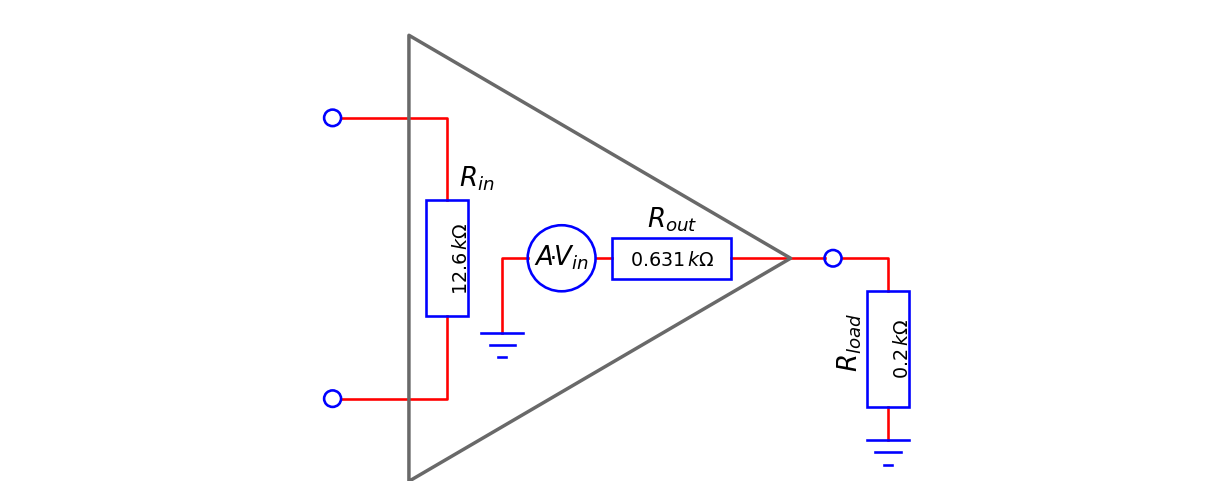

Output()

In [4]:
# Scene data

anim_fig = plt.figure()
anim_fig.set_size_inches((9.8, 4))
anim_fig.set_tight_layout(True)

scene_ax = anim_fig.add_subplot(111)
scene_ax.set_xlim((-3, 4))
scene_ax.set_ylim((-1, 1.8))
scene_ax.axis('off')

scene_ax.add_patch(patches.Polygon(np.array([[-0.7, -0.7, 1.55], [-1, 1.7, 0.35]]).T, closed=True, fill=False,
                                  lw=2, ec='dimgray', joinstyle='round', zorder=20))
scene_ax.add_patch(patches.Rectangle((-0.6, 0), 0.25, 0.7, fill=False, lw=1.5, ec='blue', zorder=10))
scene_ax.add_patch(patches.Rectangle((0.5, 0.225), 0.7, 0.25, fill=False, lw=1.5, ec='blue', zorder=10))
scene_ax.add_patch(patches.Circle((0.2, 0.35), 0.2, fill=False, lw=1.5, ec='blue', zorder=10))

scene_ax.plot([-1.1, -0.475, -0.475], [1.2, 1.2, 0.7], color='red', lw=1.5, zorder=0)
scene_ax.plot([-1.1, -0.475, -0.475], [-0.5, -0.5, 0], color='red', lw=1.5, zorder=0)

scene_ax.add_patch(patches.Circle((-1.15, 1.2), 0.05, fill=False, lw=1.5, ec='blue', zorder=10))
scene_ax.add_patch(patches.Circle((-1.15, -0.5), 0.05, fill=False, lw=1.5, ec='blue', zorder=10))

scene_ax.plot([-0.15, -0.15, 0], [-0.1, 0.35, 0.35], color='red', lw=1.5, zorder=0)

scene_ax.plot([-0.275, -0.025], [-0.1, -0.1], color='blue', lw=1.5, zorder=10)
scene_ax.plot([-0.225, -0.075], [-0.175, -0.175], color='blue', lw=1.5, zorder=10)
scene_ax.plot([-0.175, -0.125], [-0.25, -0.25], color='blue', lw=1.5, zorder=10)

scene_ax.plot([0.4, 0.5], [0.35, 0.35], color='red', lw=1.5, zorder=0)
scene_ax.plot([1.2, 1.75], [0.35, 0.35], color='red', lw=1.5, zorder=0)

scene_ax.add_patch(patches.Circle((1.8, 0.35), 0.05, fill=False, lw=1.5, ec='blue', zorder=10))
scene_ax.add_patch(patches.Rectangle((2, -0.55), 0.25, 0.7, fill=False, lw=1.5, ec='blue', zorder=10))

scene_ax.plot([1.85, 2.125, 2.125], [0.35, 0.35, 0.15], color='red', lw=1.5, zorder=0)
scene_ax.plot([2.125, 2.125], [-0.55, -0.75], color='red', lw=1.5, zorder=0)

scene_ax.plot([2, 2.25], [-0.75, -0.75], color='blue', lw=1.5, zorder=10)
scene_ax.plot([2.05, 2.2], [-0.825, -0.825], color='blue', lw=1.5, zorder=10)
scene_ax.plot([2.1, 2.15], [-0.9, -0.9], color='blue', lw=1.5, zorder=10)

scene_ax.text(0.85, 0.6, '$R_{out}$', fontsize=15, color='black', va='center_baseline', ha='center', zorder=30)
scene_ax.text(1.9, -0.05, '$R_{load}$', fontsize=15, color='black', va='center_baseline', ha='center',
              rotation=90, zorder=30)
scene_ax.text(-0.3, 0.85, '$R_{in}$', fontsize=15, color='black', va='center_baseline', ha='center', zorder=30)
scene_ax.text(0.2, 0.375, '$A\\dot{}V_{in}$', fontsize=15, color='black', va='center_baseline', ha='center', zorder=30)

Rin_text = scene_ax.text(-0.4, 0.35, '$R_{in}$', fontsize=11, color='black', va='center_baseline', ha='center',
              rotation=90, rotation_mode='anchor', zorder=30)
Rout_text = scene_ax.text(0.85, 0.35, '$R_{out}$', fontsize=11, color='black', va='center_baseline', ha='center', zorder=30)
Rload_text = scene_ax.text(2.2, -0.2, '$R_{load}$', fontsize=11, color='black', va='center_baseline', ha='center',
              rotation=90, rotation_mode='anchor', zorder=30)

# System parameters

def real_model(rg, rf, a, rin, rout, rload):
    
    global Rin_text, Rout_text, Rload_text
    
    Rin_text.set_text('${0:.3g}\/k\Omega$'.format(rin))
    Rout_text.set_text('${0:.3g}\/k\Omega$'.format(rout))
    Rload_text.set_text('${0:.3g}\/k\Omega$'.format(rload))
    
    Rg = rg / 1000   # Convert to Ohm
    Rf = rf / 1000
    Rin = rin / 1000
    Rout = rout / 1000
    Rload = rload / 1000
    
    G_ideal = -Rf / Rg   # Ideal closed-loop gain
    mu = (1 + Rout/Rf + Rout/Rload) * (1 + Rf/Rg + Rf/Rin) / (a - Rout/Rf)
    G_real = (-Rf / Rg) / (1 + mu)   # Realistic closed-loop gain
    
    print('Stvarno pojačanje zatvorene petlje:')
    print('{0:.4g}'.format(G_real))
    print('\nRazlika od idealnog slučaja:')
    print('{0:.4%}'.format((G_real-G_ideal)/G_ideal))
    
rin_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$R_{in}\ [k\Omega]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})
rout_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$R_{out}\ [k\Omega]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})
rload_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$R_{load}\ [k\Omega]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})

input_data = w.interactive_output(real_model, {'rg':rg_slider, 'rf':rf_slider, 'a':opampGain,
                                                 'rin':rin_slider, 'rout':rout_slider, 'rload':rload_slider})

display(w.HBox([rin_slider, rout_slider, rload_slider]), input_data)